In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
relief = pd.read_csv('ReliefPitching_CLEAN.csv', float_precision = 'round_trip')
relief

,Year,Tm,G,GR,GF,Wgr,Lgr,SVOpp,SV,BSv,...,Bhd,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR,Playoff
0,2000,Anaheim Angels,162,441,157,29,24,68,46,22,...,201,168,273,169,124,186,95,3.8,21,0
1,2000,Arizona Diamondbacks,162,390,146,23,24,56,38,18,...,169,129,261,120,111,140,72,3.4,19,0
2,2000,Atlanta Braves,162,376,149,19,18,67,53,14,...,142,112,264,91,101,95,81,3.2,18,1
3,2000,Baltimore Orioles,162,396,148,22,21,57,33,24,...,166,145,251,99,125,119,84,3.3,19,0
4,2000,Boston Red Sox,162,425,155,29,23,66,46,20,...,173,137,288,181,91,191,80,4.0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2021,St. Louis Cardinals,162,557,159,36,25,71,50,21,...,217,167,390,123,148,155,99,3.1,18,1
626,2021,Tampa Bay Rays,162,531,161,58,32,64,42,22,...,134,126,405,182,89,198,73,4.0,21,1
627,2021,Texas Rangers,162,507,162,27,31,51,31,20,...,269,143,364,144,98,162,50,3.7,21,0
628,2021,Toronto Blue Jays,162,537,161,30,31,52,34,18,...,208,167,370,136,136,167,63,3.2,18,0


In [3]:
# preparing the data for visualization
pd.Series.replace(relief.Playoff, to_replace = 0, value = 'No', inplace = True)
pd.Series.replace(relief.Playoff, to_replace = 1, value = 'Yes', inplace = True)
relief.Playoff = relief.Playoff.astype('category')
relief

,Year,Tm,G,GR,GF,Wgr,Lgr,SVOpp,SV,BSv,...,Bhd,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR,Playoff
0,2000,Anaheim Angels,162,441,157,29,24,68,46,22,...,201,168,273,169,124,186,95,3.8,21,No
1,2000,Arizona Diamondbacks,162,390,146,23,24,56,38,18,...,169,129,261,120,111,140,72,3.4,19,No
2,2000,Atlanta Braves,162,376,149,19,18,67,53,14,...,142,112,264,91,101,95,81,3.2,18,Yes
3,2000,Baltimore Orioles,162,396,148,22,21,57,33,24,...,166,145,251,99,125,119,84,3.3,19,No
4,2000,Boston Red Sox,162,425,155,29,23,66,46,20,...,173,137,288,181,91,191,80,4.0,21,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2021,St. Louis Cardinals,162,557,159,36,25,71,50,21,...,217,167,390,123,148,155,99,3.1,18,Yes
626,2021,Tampa Bay Rays,162,531,161,58,32,64,42,22,...,134,126,405,182,89,198,73,4.0,21,Yes
627,2021,Texas Rangers,162,507,162,27,31,51,31,20,...,269,143,364,144,98,162,50,3.7,21,No
628,2021,Toronto Blue Jays,162,537,161,30,31,52,34,18,...,208,167,370,136,136,167,63,3.2,18,No


# Figure 1

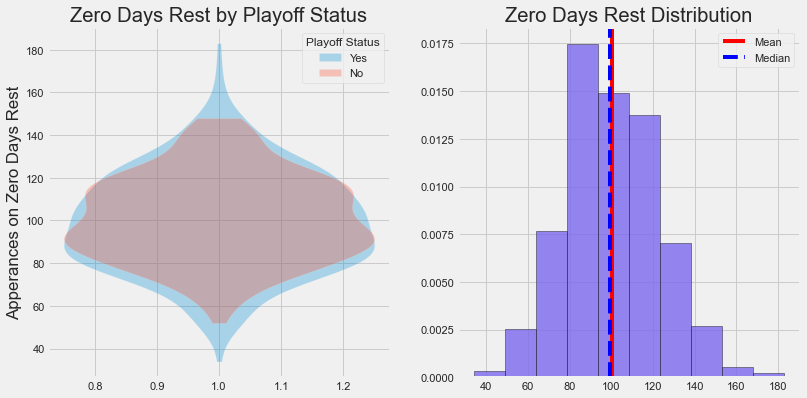

In [66]:
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
ax1.violinplot(relief.loc[relief.Playoff == 'No', '0DR'], showextrema = False)
ax1.violinplot(relief.loc[relief.Playoff == 'Yes', '0DR'], showextrema = False)
ax1.set_ylabel('Apperances on Zero Days Rest')
ax1.set_title('Zero Days Rest by Playoff Status')
ax1.legend(['Yes', 'No', 'c', 'd'], title = 'Playoff Status')
ax2.hist(relief['0DR'], color = 'mediumslateblue', alpha = 0.8, edgecolor = 'black', density = True)
ax2.axvline(relief.loc[:, '0DR'].mean(), color = 'r', label = 'Mean')
ax2.axvline(relief.loc[:, '0DR'].median(), color = 'b', linestyle = '--', label = 'Median')
ax2.legend()
ax2.set_title('Zero Days Rest Distribution')
plt.show()

# Figure 2

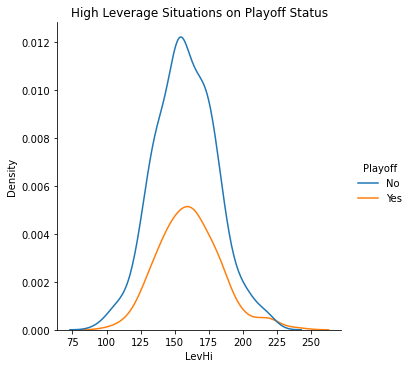

In [6]:
sns.displot(data = relief, x = 'LevHi', hue = 'Playoff', kind = 'kde')
plt.title('High Leverage Situations on Playoff Status')
plt.show()

# Figure 3

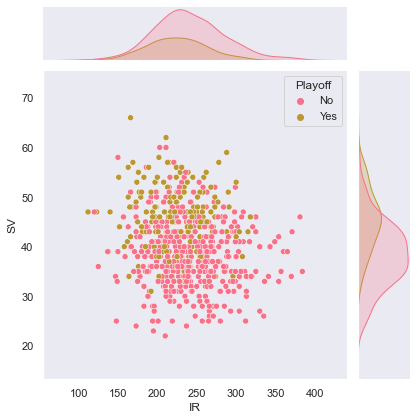

In [19]:
sns.set_theme(style = 'dark', palette = 'husl')
sns.jointplot(data = relief, x = 'IR', y = 'SV', hue = 'Playoff')
plt.show()

# Figure 4

# Figure 5